In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.svm import OneClassSVM

/Users/jackman/JupyterProjects/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data = pd.read_csv("creditcard.csv", delimiter=",")

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.describe(include="all")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Столбец Class показывает, является ли транзакция мошеннической(аномалия), или нет. Процент аномаливй составляет 0.1727%. Возьмём это значение за экспертную оценку. Построим несколько моделей и сравним их результаты с эксперной оценкой.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

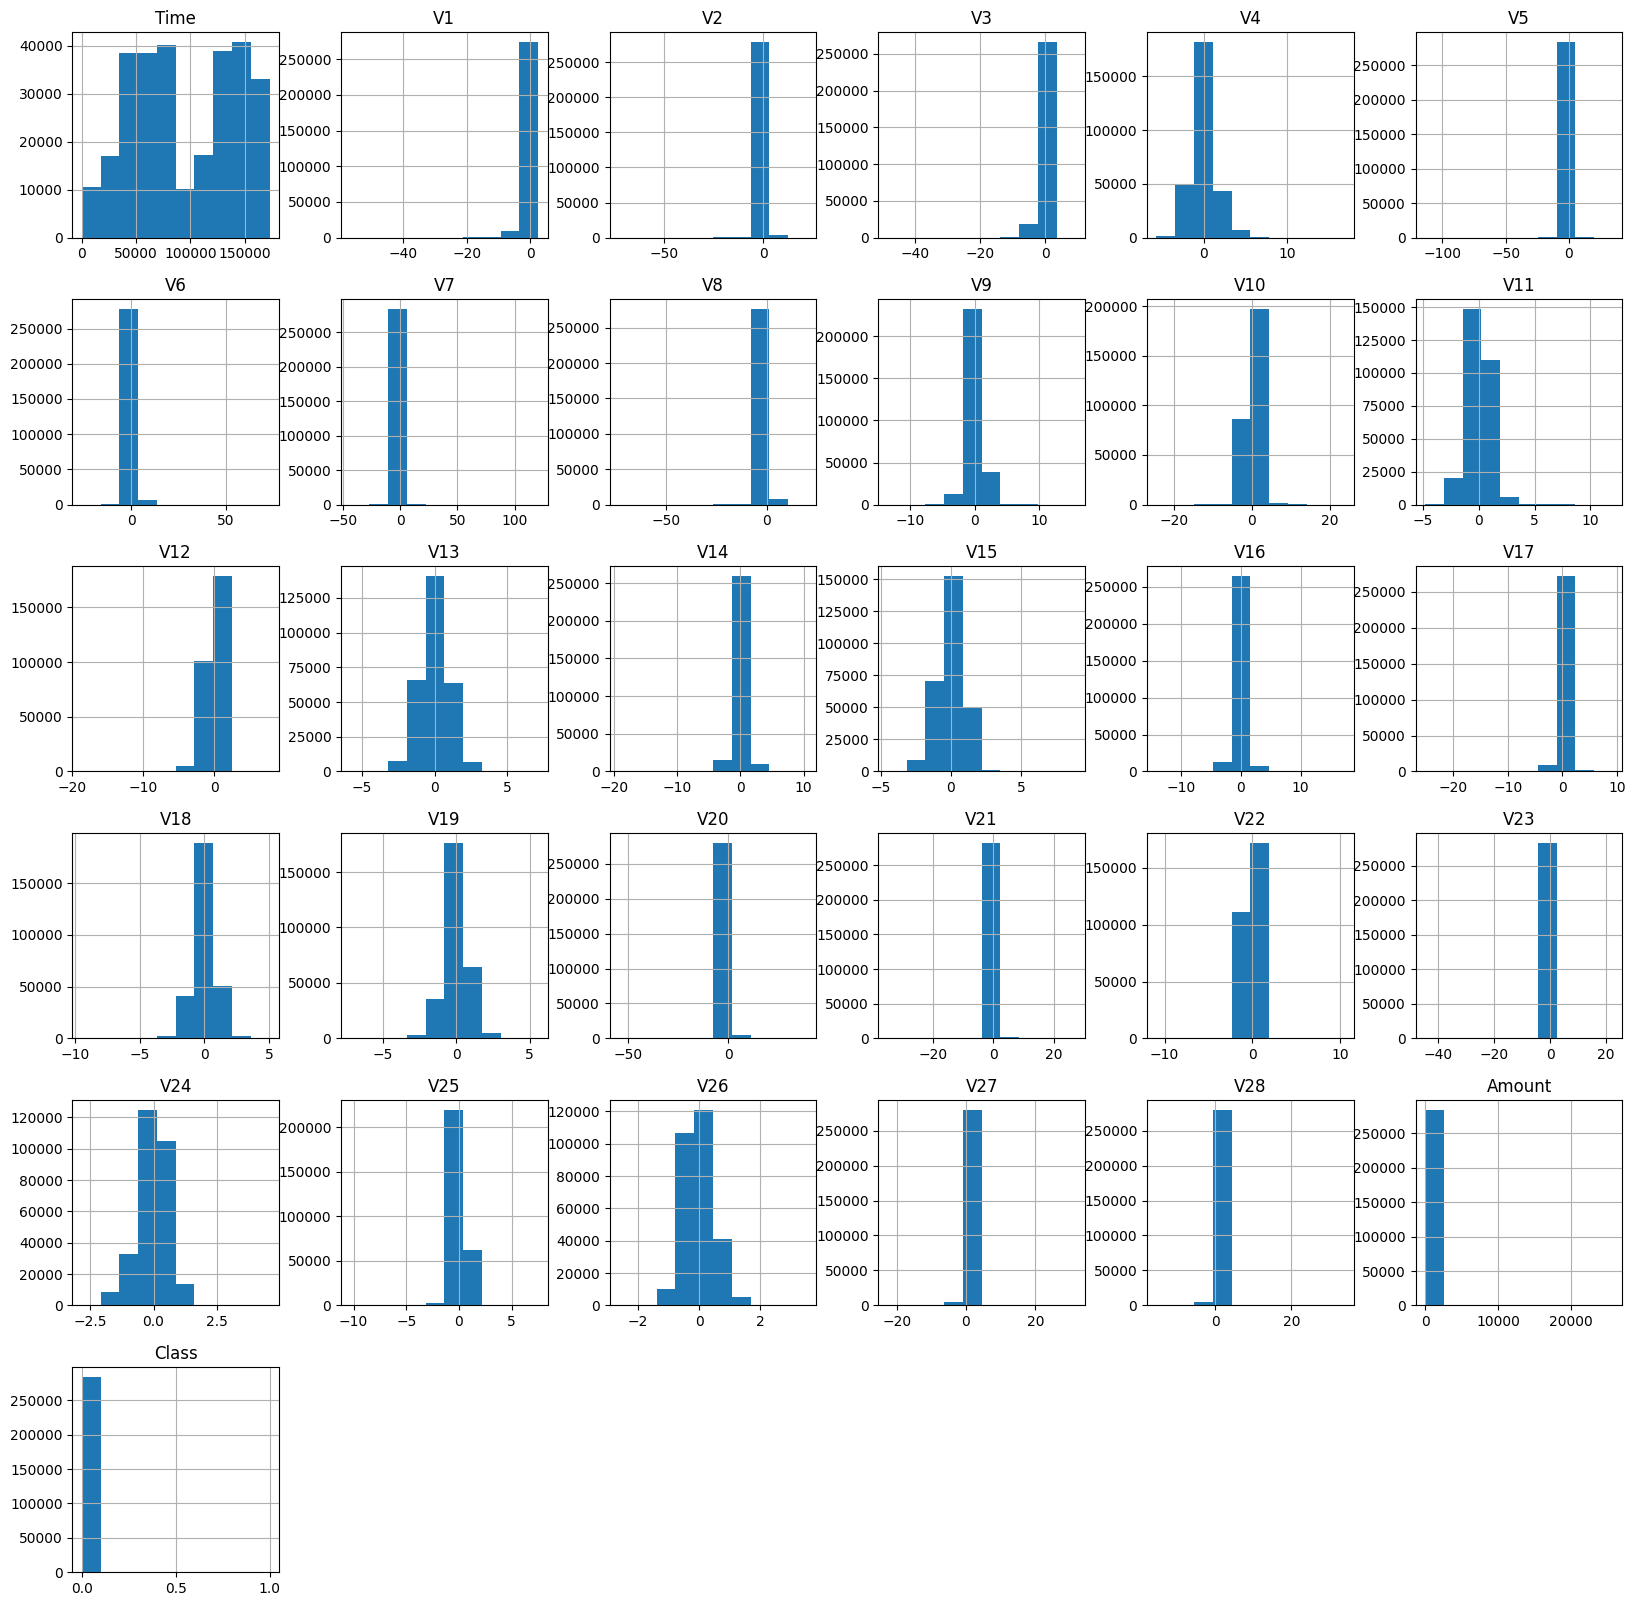

In [7]:
data.hist(figsize=(20, 20));

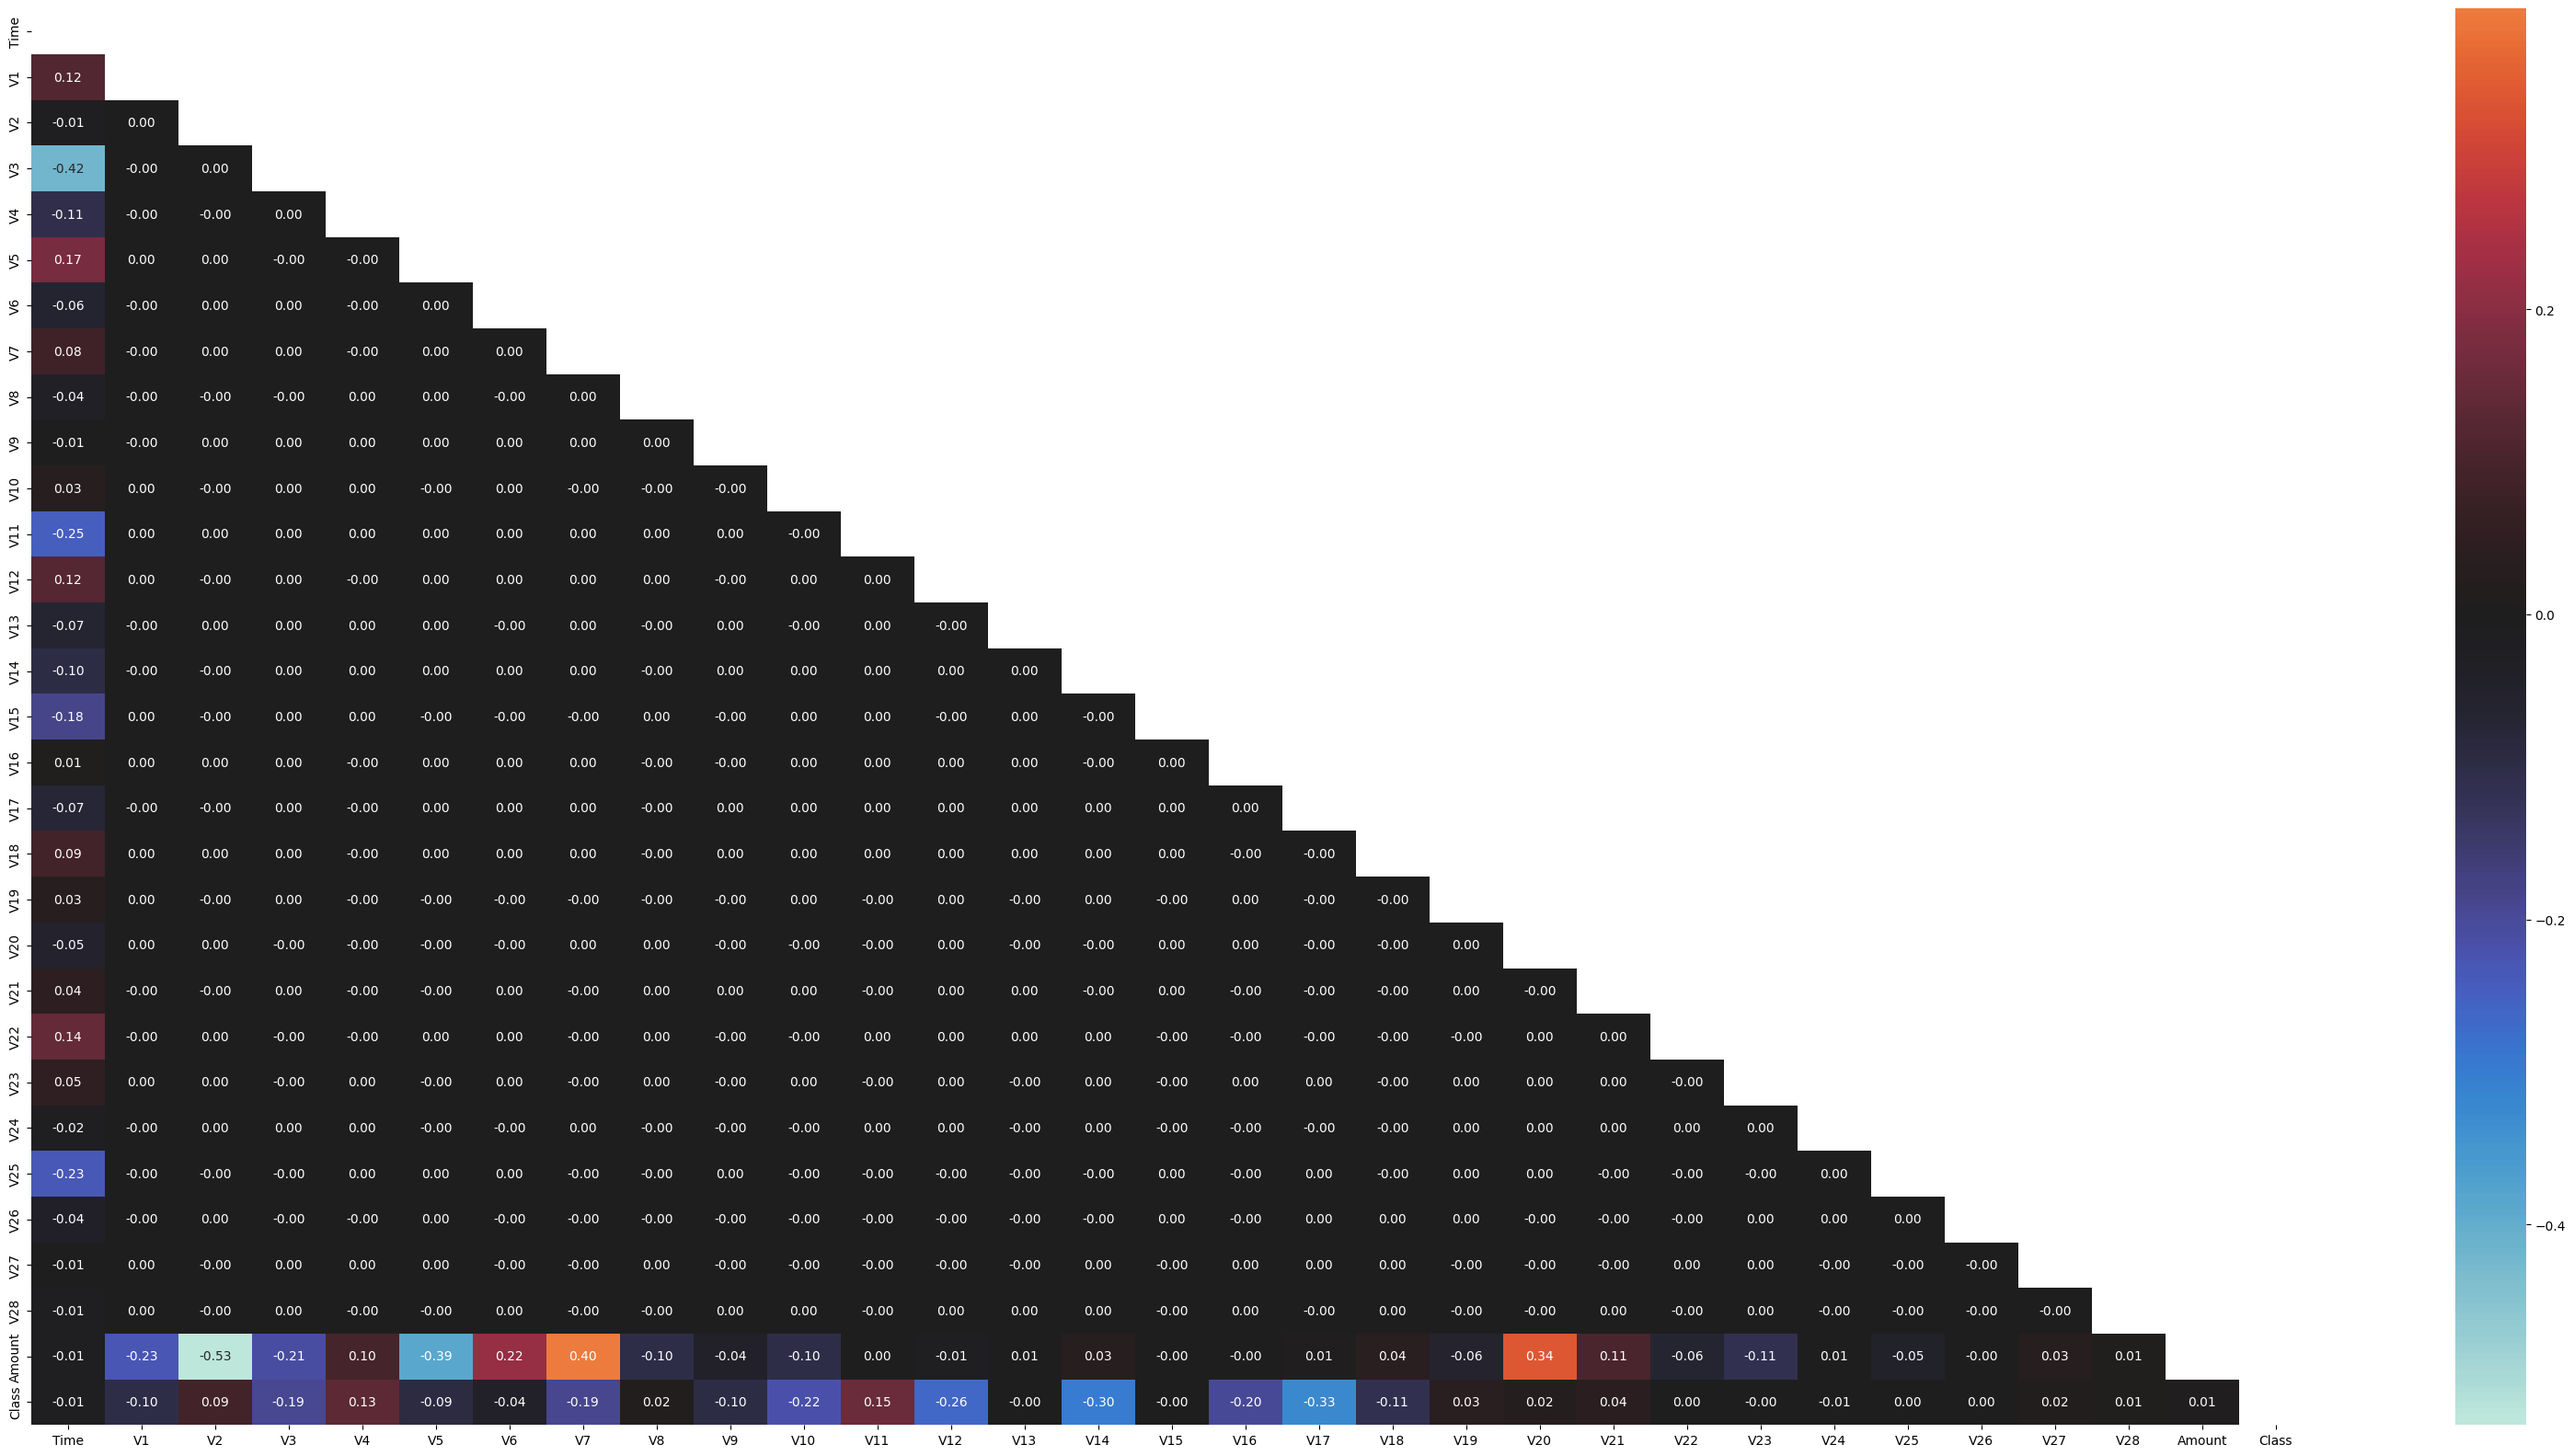

In [8]:
plt.figure(figsize=(40,20))

corr_matrix = data.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool))

sns.heatmap(lower, annot=True, fmt='.2f', cbar=True, center=0);

### Добавим пару нужных ф-й

In [9]:
# Отображение метрик "Classification Report" и "Confusion Matrix"
def show_metrics(y, data):
    print("Classification Report:")
    print(classification_report(y, data))
    print("Confusion Matrix:")
    print(confusion_matrix(y, data))

In [10]:
# Создание пустого датафрейма для хранения результатов
results_df = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1-Score'])

# Функция для добавления результатов в датафрейм
def add_results(model_name, y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1_score = report['1']['f1-score']
    results_df.loc[len(results_df)] = [model_name, precision, recall, f1_score]

### Разделим данные на признаки и целевую переменную. Проведем нормализацию признаков.

In [11]:
X_scaled = MinMaxScaler().fit_transform(data.iloc[:, :-1])
X_scaled = pd.DataFrame(X_scaled, columns=data.iloc[:, :-1].columns)
Y = data.iloc[:, -1]
X_scaled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,0.756448,0.873531,0.666991,0.160317,0.729603,0.236810,0.235393,0.863749,0.528729,...,0.595979,0.564920,0.515249,0.680500,0.313600,0.658558,0.466291,0.433929,0.329840,0.000030
284803,0.999971,0.945845,0.766677,0.872678,0.219189,0.771561,0.273661,0.265504,0.788548,0.482925,...,0.580900,0.564933,0.553153,0.665619,0.245298,0.543855,0.360884,0.417775,0.312038,0.000965
284804,0.999977,0.990905,0.764080,0.781102,0.227202,0.783425,0.293496,0.263547,0.792985,0.477677,...,0.580280,0.565220,0.537005,0.664877,0.468492,0.592824,0.411177,0.416593,0.312585,0.002642
284805,0.999977,0.954209,0.772856,0.849587,0.282508,0.763172,0.269291,0.261175,0.792671,0.476287,...,0.581622,0.565755,0.547353,0.663008,0.398836,0.545958,0.514746,0.418520,0.315245,0.000389


## Метод 3 сигм

In [12]:
# Инициализация DataFrame для хранения аномалий
anomalies = pd.DataFrame()

# Применение правила трех сигм ко всем признакам
for column in X_scaled.columns:
    mean = X_scaled[column].mean()
    std = X_scaled[column].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    column_anomalies = data[(X_scaled[column] < lower_bound) | (X_scaled[column] > upper_bound)]
    anomalies = pd.concat([anomalies, column_anomalies])

# Удаление дубликатов
anomalies = anomalies.drop_duplicates()
anomalies = data.index.isin(anomalies.index).astype(int)
add_results('Three Sigma Rule', Y, anomalies)
show_metrics(Y, anomalies)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93    284315
           1       0.01      0.86      0.02       492

    accuracy                           0.87    284807
   macro avg       0.51      0.87      0.48    284807
weighted avg       1.00      0.87      0.93    284807

Confusion Matrix:
[[247241  37074]
 [    67    425]]


True Negatives (TN): 247241 — Нормальные транзакции, правильно классифицированные как нормальные.  
False Positives (FP): 37074 — Нормальные транзакции, ошибочно классифицированные как аномальные.  
False Negatives (FN): 67 — Мошеннические транзакции, ошибочно классифицированные как нормальные.  
True Positives (TP): 425 — Мошеннические транзакции, правильно классифицированные как аномальные.  

#### Для класса 0 (не мошенничество)**  
**Precision (точность)**: 1.00  
Все транзакции, предсказанные как нормальные, действительно нормальные.  
**Recall (полнота)**: 0.87  
87% всех нормальных транзакций правильно классифицированы.  
**F1-score**: 0.93  
F1-score, учитывающий баланс между точностью и полнотой, высок.  

#### Для класса 1 (мошенничество)
**Precision (точность)**: 0.01  
Из всех транзакций, предсказанных как мошеннические, только 1% действительно мошеннические. Очень низкая точность указывает на большое количество ложных тревог.  
**Recall (полнота)**: 0.86  
86% всех настоящих мошеннических транзакций правильно обнаружены. Это высокий показатель, указывающий на хорошую способность модели находить истинные аномалии.  
**F1-score**: 0.02  
Низкий F1-score из-за очень низкой точности.

In [13]:
# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42, stratify=Y)


### Модель IsolationForest

In [14]:
# Isolation Forest
iso_forest = IsolationForest(contamination=0.2, random_state=42)
iso_forest.fit(X_train)
# Isolation Forest
y_pred_iso_forest_test = iso_forest.predict(X_test)
y_pred_iso_forest_test = np.where(y_pred_iso_forest_test == 1, 0, 1)  # Конвертация: 1 (normal) -> 0, -1 (anomaly) -> 1

add_results('Isolation Forest', y_test, y_pred_iso_forest_test)
show_metrics(y_test, y_pred_iso_forest_test)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89     56864
           1       0.01      0.94      0.02        98

    accuracy                           0.80     56962
   macro avg       0.50      0.87      0.45     56962
weighted avg       1.00      0.80      0.89     56962

Confusion Matrix:
[[45402 11462]
 [    6    92]]


### Модель LogisticRegression

In [15]:
# Модель логистической регрессии
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

add_results('Logistic Regression', y_test, y_pred_lr)
show_metrics(y_test, y_pred_lr)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.48      0.59        98

    accuracy                           1.00     56962
   macro avg       0.89      0.74      0.80     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56851    13]
 [   51    47]]


### Модель RandomForest

In [16]:
# Модель случайного леса
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

add_results('Random Forest', y_test, y_pred_rf)
show_metrics(y_test, y_pred_rf)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.81      0.87        98

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56860     4]
 [   19    79]]


### Отобразим сжатое представление исходных данных

In [17]:
# Визуализация
def clust_plots(data, y, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=y, palette='viridis', alpha=0.5)
    plt.title(title)

    plt.tight_layout()
    plt.show()

/Users/jackman/JupyterProjects/.venv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


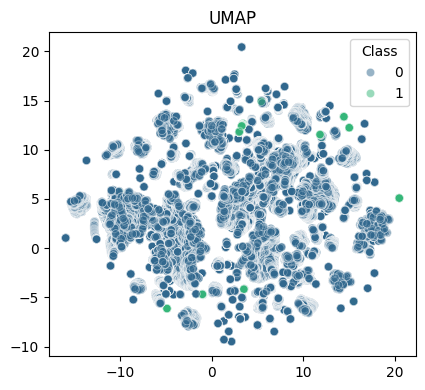

In [18]:
# Уменьшим размерность с помощью UMAP
umap = UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X_scaled)
clust_plots(X_umap, Y, 'UMAP')

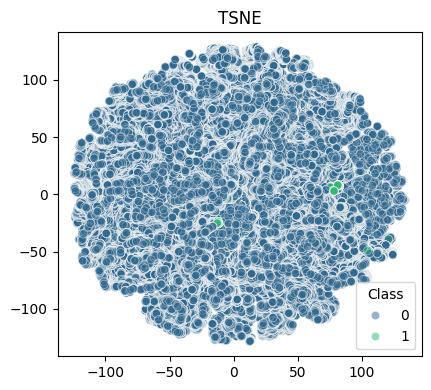

In [19]:
# И TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
clust_plots(X_tsne, Y, 'TSNE')

## Выводы:

In [20]:
results_df

,Model,Precision,Recall,F1-Score
0,Three Sigma Rule,0.011334,0.863821,0.022374
1,Isolation Forest,0.007963,0.938776,0.015791
2,Logistic Regression,0.783333,0.479592,0.594937
3,Random Forest,0.951807,0.806122,0.872928


### Правило трех сигм и Isolation Forest:  
Эти методы показывают высокую полноту, но крайне низкую точность и значение F1-Score. Это говорит о том, что есть множество ложных положительных срабатываний. Данные методы могут быть полезны для начального выявления аномалий, но требуют дополнительной фильтрации для снижения ложных срабатываний.


### Логистическая регрессия:  
Демонстрирует хороший баланс между точностью и полнотой, но пропускает некоторые мошеннические транзакции. Может быть полезна в сочетании с другими методами.


### Random Forest:  
Метод показал лучшие результаты для данной задачи благодаря высокому F1-Score, точности и полноте. Эта модель лучше всех подходит для практического обнаружения мошенничеств.

### Графики

Метод UMAP - судя по этому графику мошеннические транзакции похожи на аномалии.  
Метод TSNE - на данном графике мошеннические транзакции не выглядят как аномалии.